# Figure : Variance Plots and Elbow Plots

In [1]:
# Import Python modules
import os, sys
from pathlib import Path
import numpy as np
import pandas as pd
import xarray as xr
# matplotlib
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from mpl_toolkits.axes_grid1 import AxesGrid
from matplotlib.colors import ListedColormap
from matplotlib import rcParams
# plot styles/formatting
import seaborn as sns

from IPython.display import Image, display

# Path to modules
sys.path.append('../modules')
# Import my modules
from eofs import *
from kmeans import *

In [2]:
# Set up paths

path_to_data = '/home/nash/DATA/data/'                            # project data -- read only
path_to_out  = '/home/nash/DATA/repositories/AR_types/out/'       # output files (numerical results, intermediate datafiles) -- read & write
path_to_figs = '/home/nash/DATA/repositories/AR_types/figs/'      # figures


In [3]:
# Set default font for all plots
rcParams['font.family'] = 'sans-serif'   # set the default font family to 'sans-serif'
rcParams['font.sans-serif'] = 'Arial'    # set the default sans-serif font to 'Arial'


### Calculate Explained Variance

In [ ]:
ceofid = 'HUV500'
neofs = 2 # choose number of eofs
nk = 3 # choose number of clusters

In [4]:
err_lst = []
neofs_lst = []
pctvar_lst = []
n_events = [205., 237.]

for k, ssn in enumerate(['djf', 'mam', 'djfmam']):   
    ## Eigenvalues
    filepath =  path_to_out + ceofid + '/' + ssn + '/' + 'eigenvalues_tcor.txt'
    df = pd.read_csv(filepath, header=None, names=['evals'])
    evals = df.evals.values
    # Calculate the percent explained var by each eigenvector
    pctvar = pct_variance(evals)
    # Number of EOFs that explain more than 1% of the total variance
    idx = pctvar[pctvar >= 1.0]
    neofs = len(idx)

    # North Test
    total_events = n_events[k]
    err = north_test(evals, total_events)
    
    err_lst.append(err)
    neofs_lst.append(neofs)
    pctvar_lst.append(pctvar)
    

### Calculate Elbow

In [5]:
# Loadings & AR CAT
kclusters_lst = []
cohesion_lst = []
for i, ssn in enumerate(['djf', 'mam']):
    filename = path_to_out + 'loadings_'+ 'HUV500t0120050cor' + ssn + '.txt'
    df = pd.read_csv(filename, header=None, names=['EOF1', 'EOF2'])
    xdata = df.values
    
    # Determine optimal K
    # maximum number of clusters (number of iterations)
    kmax =15
    kclusters, cohesion = plot_optimal_k(xdata, kmax, create_plot=False)
    kclusters_lst.append(kclusters)
    cohesion_lst.append(cohesion)

/home/nash/DATA/repositories/AR_types/figs/variance_elbow.png


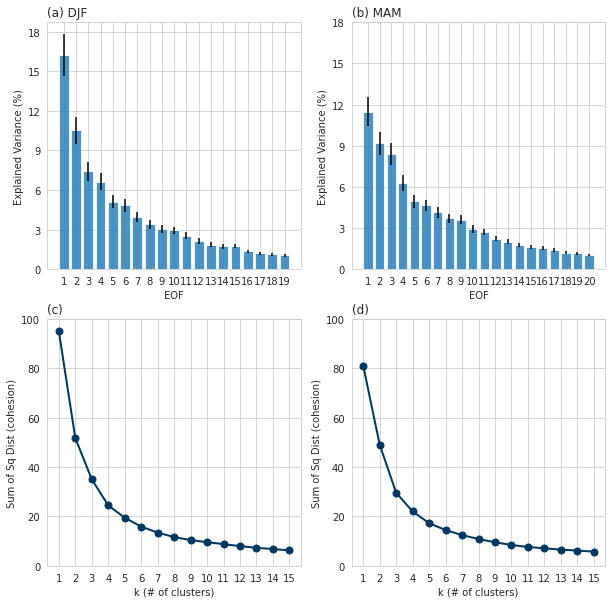

<Figure size 720x720 with 0 Axes>

In [26]:
# Create figure
fig = plt.figure(figsize=(10,10))
fname = path_to_figs + 'variance_elbow'
fmt = 'png'
nrows = 2
ncols = 2
nplots=nrows*ncols
plt_lbl1 = ['(a) DJF', '(b) MAM']
plt_lbl2 = ['(c)', '(d)']

# Set custom color palette
colors = ["#003660"]
sns.set_palette(sns.color_palette(colors))
sns.set_style("whitegrid")

# Variance Plots
for k in np.arange(nrows):
    ax = fig.add_subplot(nrows, ncols, k+1)
    neofs = neofs_lst[k]
    pctvar = pctvar_lst[k]
    err = err_lst[k]
    # plot data
    xvals = np.arange(neofs) + 1
    ax.bar(xvals, pctvar[0:neofs], yerr=err[0:neofs], 
           color='tab:blue', alpha=0.8)

    # x-axis
    ax.set_xlabel('EOF')
    ax.set_xticks(xvals)

    # y-axis
    ax.set_ylabel('Explained Variance (%)')
    ax.set_yticks(np.arange(0, 21, 3))
    
    # subtitles
    ax.set_title(plt_lbl1[k], loc='left')

# Elbow Plots
for k in np.arange(nrows):
    ax = fig.add_subplot(nrows, ncols, k+3)
    kclusters = kclusters_lst[k]
    cohesion = cohesion_lst[k]
    ax.plot(kclusters, cohesion, marker='o', linewidth=2.0, markersize=7.0)
    ax.set_ylabel('Sum of Sq Dist (cohesion)')
    ax.set_xlabel('k (# of clusters)')
    ax.set_xticks(kclusters)
    ax.set_yticks(np.arange(0, 110, 20))
    
    # subtitles
    ax.set_title(plt_lbl2[k], loc='left')

# Save the figure
fig.savefig('%s.%s' % (fname, fmt), bbox_inches='tight', dpi=fig.dpi)
fig.clf()

plotFile = fname + '.png'
print(plotFile)
display(Image(plotFile))